# Phase 1&2: Training and Testing

## Step 1: Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from astropy.table import Table , Column


## Step 2: Read, Understand and Pre-process Train/Test Data


### Step 2.1: Read Data

In [2]:
trainData = pd.read_csv('train.csv')  #read train.csv
testData = pd.read_csv('test.csv')    #read test.csv


### Step 2.2: Understand Data

In [3]:
trainData.columns.name="index"
print("Train Dataset:")
print(trainData)


Train Dataset:
index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female


In [4]:
print("Train Data Set Columns:")
trainDatadf=pd.DataFrame(trainData)
trainDataIndex=trainDatadf.columns
print(trainDataIndex)

print("\n")
print("Number of instances in Train Dataset")
print("Train Instances: %s"% (len(trainDatadf.index)))


Train Data Set Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object', name='index')


Number of instances in Train Dataset
Train Instances: 6


In [5]:
trainDataIndex

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object', name='index')

In [6]:
trainDatadf

index,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [7]:
testData.columns.name="index"
print("Test Dataset:")
print(testData)

Test Dataset:
index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female


In [8]:
print("Test Data Set Columns:")
testDatadf=pd.DataFrame(testData)
testDataIndex=testDatadf.columns
print(testDataIndex)

print("\n")
print("Number of instances in Test Dataset")
print("Test Instances: %s"% (len(testDatadf.index)))

Test Data Set Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object', name='index')


Number of instances in Test Dataset
Test Instances: 4


In [9]:
maleTrainDatadf=trainData["gender"].isin(["Male"])
print("%s Train instances having label 'Male':"% (len(trainDatadf[maleTrainDatadf].index)))
print(trainDatadf[maleTrainDatadf])

3 Train instances having label 'Male':
index    height  weight   hair beard scarf gender
0      180.3000     196   Bald   Yes    No   Male
2      178.5000     200  Short    No    No   Male
4      175.2222     220  Short   Yes    No   Male


In [10]:
femaleTrainDatadf=trainData["gender"].isin(["Female"])
print("%s Train instances having label 'Female':"% (len(trainDatadf[femaleTrainDatadf].index)))
print(trainDatadf[femaleTrainDatadf])

3 Train instances having label 'Female':
index  height  weight    hair beard scarf  gender
1       170.0     120    Long    No    No  Female
3       163.4     110  Medium    No   Yes  Female
5       165.0     150  Medium    No   Yes  Female


In [11]:
maleTestDatadf=testData["gender"].isin(["Male"])
print("%s Test instances having label 'Male':"% (len(testDatadf[maleTestDatadf].index)))
print(testDatadf[maleTestDatadf])

2 Test instances having label 'Male':
index  height  weight  hair beard scarf gender
0       179.1     185  Long   Yes    No   Male
2       177.8     160  Bald    No    No   Male


In [12]:
maleTestDatadf=testData["gender"].isin(["Female"])
print("%s Test instances having label 'Female':"% (len(testDatadf[maleTestDatadf].index)))
print(testDatadf[maleTestDatadf])

2 Test instances having label 'Female':
index  height  weight    hair beard scarf  gender
1       160.5     130   Short    No    No  Female
3       161.1     100  Medium    No    No  Female


Total numbers of 'Males' and 'Female' in Train Dataset


Text(0, 0.5, 'Count')

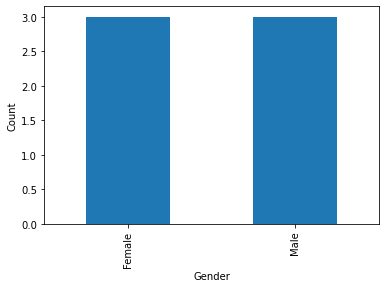

In [13]:
print("Total numbers of 'Males' and 'Female' in Train Dataset")

group=trainDatadf.groupby(["gender"]).size()
group.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Count")


Number of people having various hair length in Train Dataset


Text(0, 0.5, 'Count')

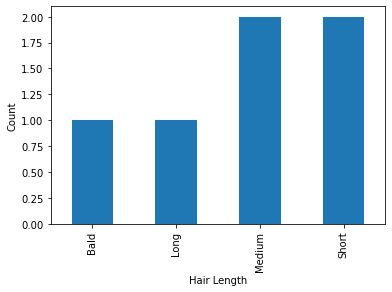

In [14]:
print("Number of people having various hair length in Train Dataset")

group=trainDatadf.groupby(["hair"]).size()
group.plot.bar()
plt.xlabel("Hair Length")
plt.ylabel("Count")



Number of people having various hair length in Test Dataset


Text(0, 0.5, 'Count')

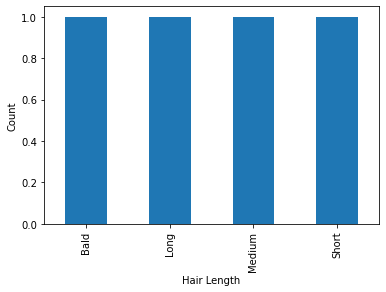

In [15]:
print("Number of people having various hair length in Test Dataset")

group=testDatadf.groupby(["hair"]).size()
group.plot.bar()
plt.xlabel("Hair Length")
plt.ylabel("Count")


Number of people have/haven't beard in Train Dataset


Text(0, 0.5, 'Count')

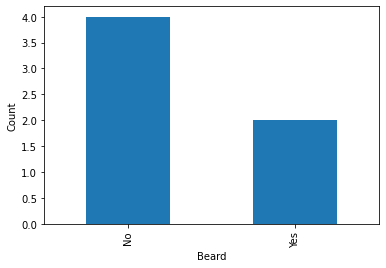

In [16]:
print("Number of people have/haven't beard in Train Dataset")

group=trainDatadf.groupby(["beard"]).size()
group.plot.bar()
plt.xlabel("Beard")
plt.ylabel("Count")


Number of people have/haven't beard in Test Dataset


Text(0, 0.5, 'Count')

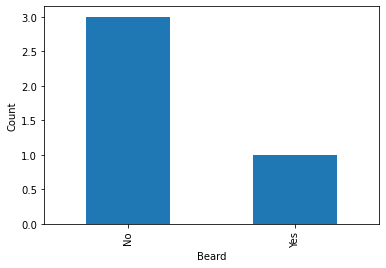

In [17]:
print("Number of people have/haven't beard in Test Dataset")

group=testDatadf.groupby(["beard"]).size()
group.plot.bar()
plt.xlabel("Beard")
plt.ylabel("Count")

### Step 2.3: Pre-Process Data

In [18]:
print("Train Dataset before Preprocessing: \n")
print(trainDatadf)
print ("\n")
print("Train Dataset after Preprocessing: \n")
preprocessTrainDatadf=trainDatadf.round({"height":2})
print(preprocessTrainDatadf)

Train Dataset before Preprocessing: 

index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female


Train Dataset after Preprocessing: 

index  height  weight    hair beard scarf  gender
0      180.30     196    Bald   Yes    No    Male
1      170.00     120    Long    No    No  Female
2      178.50     200   Short    No    No    Male
3      163.40     110  Medium    No   Yes  Female
4      175.22     220   Short   Yes    No    Male
5      165.00     150  Medium    No   Yes  Female


In [19]:
print("Test Dataset before Preprocessing: \n")
print(testDatadf)
print ("\n")
print("Test Dataset after Preprocessing: \n")
preprocessTestDatadf=testDatadf.round({"height":2})
print(preprocessTestDatadf)

Test Dataset before Preprocessing: 

index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female


Test Dataset after Preprocessing: 

index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female


## Step 3: Label Encoding for Train/Test Data

In [20]:
print("Gender attribute encoding in Train Dataset: \n")

preprocessTrainDatadf["encode_gender"]=LabelEncoder().fit_transform(preprocessTrainDatadf["gender"])
print(preprocessTrainDatadf[["gender","encode_gender"]])

Gender attribute encoding in Train Dataset: 

index  gender  encode_gender
0        Male              1
1      Female              0
2        Male              1
3      Female              0
4        Male              1
5      Female              0


In [21]:
print("Scarf attribute encoding in train Dataset: \n")

preprocessTrainDatadf["encode_scarf"]=LabelEncoder().fit_transform(preprocessTrainDatadf["scarf"])
print(preprocessTrainDatadf[["scarf","encode_scarf"]])

Scarf attribute encoding in train Dataset: 

index scarf  encode_scarf
0        No             0
1        No             0
2        No             0
3       Yes             1
4        No             0
5       Yes             1


In [22]:
print("Beard attribute encoding in train Dataset: \n")

#lblEncdr=LabelEncoder()
preprocessTrainDatadf["encode_beard"]=LabelEncoder().fit_transform(preprocessTrainDatadf["beard"])
print(preprocessTrainDatadf[["beard","encode_beard"]])

Beard attribute encoding in train Dataset: 

index beard  encode_beard
0       Yes             1
1        No             0
2        No             0
3        No             0
4       Yes             1
5        No             0


In [23]:
print("Hair attribute encoding in train Dataset")

print("\n")
preprocessTrainDatadf["encode_hair"]=LabelEncoder().fit_transform(preprocessTrainDatadf["hair"])
print(preprocessTrainDatadf[["hair","encode_hair"]])

Hair attribute encoding in train Dataset


index    hair  encode_hair
0        Bald            0
1        Long            1
2       Short            3
3      Medium            2
4       Short            3
5      Medium            2


In [24]:
print("Gender attribute encoding in Test Dataset: \n")

preprocessTestDatadf["encode_gender"]=LabelEncoder().fit_transform(preprocessTestDatadf["gender"])
print(preprocessTestDatadf[["gender","encode_gender"]])

Gender attribute encoding in Test Dataset: 

index  gender  encode_gender
0        Male              1
1      Female              0
2        Male              1
3      Female              0


In [25]:
print("Scarf attribute encoding in Test Dataset: \n")

preprocessTestDatadf["encode_scarf"]=LabelEncoder().fit_transform(preprocessTestDatadf["scarf"])
print(preprocessTestDatadf[["scarf","encode_scarf"]])

Scarf attribute encoding in Test Dataset: 

index scarf  encode_scarf
0        No             0
1        No             0
2        No             0
3        No             0


In [26]:
print("Beard attribute encoding in Test Dataset: \n")

preprocessTestDatadf["encode_beard"]=LabelEncoder().fit_transform(preprocessTestDatadf["beard"])
print(preprocessTestDatadf[["beard","encode_beard"]])

Beard attribute encoding in Test Dataset: 

index beard  encode_beard
0       Yes             1
1        No             0
2        No             0
3        No             0


In [27]:
print("Hair attribute encoding in Test Dataset: \n")

preprocessTestDatadf["encode_hair"]=LabelEncoder().fit_transform(preprocessTestDatadf["hair"])
print(preprocessTestDatadf[["hair","encode_hair"]])

Hair attribute encoding in Test Dataset: 

index    hair  encode_hair
0        Long            1
1       Short            3
2        Bald            0
3      Medium            2


In [28]:
print("Orignal Training Dataset: \n")
print(trainData)

print("\n")

print("Training Dataset after Label Encoding: \n")

labelTrainDatadf= preprocessTrainDatadf[["weight","height","encode_hair","encode_beard","encode_scarf","encode_gender"]]
fTrainDatadf= labelTrainDatadf.rename(columns={"encode_gender":"gender", "encode_beard":"beard","encode_scarf":"scarf","encode_hair":"hair"})
print(fTrainDatadf)

Orignal Training Dataset: 

index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female


Training Dataset after Label Encoding: 

index  weight  height  hair  beard  scarf  gender
0         196  180.30     0      1      0       1
1         120  170.00     1      0      0       0
2         200  178.50     3      0      0       1
3         110  163.40     2      0      1       0
4         220  175.22     3      1      0       1
5         150  165.00     2      0      1       0


In [29]:
print("\n Orignal Testing Dataset: \n")
print(testData)

print("\n")

print("Testing Dataset after Label Encoding: \n")

labelTestDatadf= preprocessTestDatadf[["height","weight","encode_hair","encode_beard","encode_scarf","encode_gender"]]
fTestDatadf= labelTestDatadf.rename(columns={"encode_gender":"gender", "encode_beard":"beard","encode_scarf":"scarf","encode_hair":"hair"})
print(fTestDatadf)


 Orignal Testing Dataset: 

index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female


Testing Dataset after Label Encoding: 

index  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     3      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     2      0      0       0


## Step 4: Feature Extraction - Value of Attributes

Not applicable in this problem.

## Step 5: Train ML Algorithms using Train Data

In [30]:
inputTrainAt=fTrainDatadf.iloc[:, :-1].values
outputTrainAt=fTrainDatadf.iloc[:, 5].values

inputTestAt=fTestDatadf.iloc[:,: -1].values
outputTestAt=fTestDatadf.iloc[:, 5].values

In [31]:
trainData

index,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [32]:
outputTrainAt

array([1, 0, 1, 0, 1, 0])

In [33]:
inputTrainAt

array([[196.  , 180.3 ,   0.  ,   1.  ,   0.  ],
       [120.  , 170.  ,   1.  ,   0.  ,   0.  ],
       [200.  , 178.5 ,   3.  ,   0.  ,   0.  ],
       [110.  , 163.4 ,   2.  ,   0.  ,   1.  ],
       [220.  , 175.22,   3.  ,   1.  ,   0.  ],
       [150.  , 165.  ,   2.  ,   0.  ,   1.  ]])

In [34]:
print("Prameters and their values: \n")
logisticRegression=LogisticRegression()
print(logisticRegression)

Prameters and their values: 

LogisticRegression()


In [35]:

logisticRegression.fit(inputTrainAt,outputTrainAt)

outputPredictionLR=logisticRegression.predict(inputTestAt)

In [36]:
print("Prameters and their values: \n")
randomForest=RandomForestClassifier()
print(randomForest)

Prameters and their values: 

RandomForestClassifier()


In [37]:
randomForest.fit(inputTrainAt,outputTrainAt)
outputPredictionRF = randomForest.predict(inputTestAt)

In [38]:
print("Prameters and their values: \n")
linearSvc=LinearSVC()
print(linearSvc)

Prameters and their values: 

LinearSVC()


In [39]:
linearSvc.fit(inputTrainAt,outputTrainAt)
outputPredictionSVC = linearSvc.predict(inputTestAt)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [40]:
print("Prameters and their values: \n")
bernoulliNB=BernoulliNB()
print(bernoulliNB)

Prameters and their values: 

BernoulliNB()


In [41]:
bernoulliNB.fit(inputTrainAt,outputTrainAt)
outputPredictionNB = bernoulliNB.predict(inputTestAt)

## Step 6: Evaluate ML Algorithms using Test Data

In [42]:
print("prediction usinsg Logistic Regression:\n")

testingLRdf = testData 
testingLRdf['predicted_gender']=outputPredictionLR
print(testingLRdf)
lrAccuracy = format( logisticRegression.score(inputTestAt, outputTestAt))
print("\n")
print("Accuracy: %s"% lrAccuracy)

prediction usinsg Logistic Regression:

index  height  weight    hair beard scarf  gender  predicted_gender
0       179.1     185    Long   Yes    No    Male                 1
1       160.5     130   Short    No    No  Female                 0
2       177.8     160    Bald    No    No    Male                 1
3       161.1     100  Medium    No    No  Female                 0


Accuracy: 1.0


In [43]:
print("prediction usinsg Random Forest Classifier:\n")

testingRFdf = testData 
testingRFdf['predicted_gender']=outputPredictionRF
print(testingRFdf)
rfAccuracy = format( randomForest.score(inputTestAt, outputTestAt))
print("\n")
print("Accuracy: %s"% rfAccuracy)

prediction usinsg Random Forest Classifier:

index  height  weight    hair beard scarf  gender  predicted_gender
0       179.1     185    Long   Yes    No    Male                 1
1       160.5     130   Short    No    No  Female                 0
2       177.8     160    Bald    No    No    Male                 1
3       161.1     100  Medium    No    No  Female                 0


Accuracy: 1.0


In [44]:
print("prediction usinsg Linear SVC:\n")

testingSVCdf = testData 
testingSVCdf['predicted_gender']=outputPredictionSVC
print(testingSVCdf)
SVCAccuracy = format( linearSvc.score(inputTestAt, outputTestAt))
print("\n")
print("Accuracy: %s"% SVCAccuracy)

prediction usinsg Linear SVC:

index  height  weight    hair beard scarf  gender  predicted_gender
0       179.1     185    Long   Yes    No    Male                 0
1       160.5     130   Short    No    No  Female                 1
2       177.8     160    Bald    No    No    Male                 1
3       161.1     100  Medium    No    No  Female                 1


Accuracy: 0.25


In [45]:
print("prediction usinsg BernoulliNB:\n")

testingNBdf = testData 
testingNBdf['predicted_gender']=outputPredictionNB
print(testingNBdf)
nbAccuracy = format( bernoulliNB.score(inputTestAt, outputTestAt))
print("\n")
print("Accuracy: %s"% nbAccuracy)

prediction usinsg BernoulliNB:

index  height  weight    hair beard scarf  gender  predicted_gender
0       179.1     185    Long   Yes    No    Male                 1
1       160.5     130   Short    No    No  Female                 0
2       177.8     160    Bald    No    No    Male                 1
3       161.1     100  Medium    No    No  Female                 0


Accuracy: 1.0


## Step 7: Selection of Best Model

In [46]:
print("Detailed performance of all the models")
print("======================================")
print("\n    Model                   Accuracy")
print(" -----------------------------------")
print("\n LogisticRegression           0.75")
print(" RandomForestClassifier       1.0")
print(" Linear SVC                   0.75")
print(" BernoulliNb                  1.0")
print("\n")
print("Best Model")
print("===========\n")

print("    Model                   Accuracy")
print(" -----------------------------------")
print(" RandomForestClassifier       1.0")
#bestModel=PrettyTable(["Model","Accuracy"])
#bestmodel.add_row(["RandomForestClassifier",rfAccuracy])
#print(bestModel)


Detailed performance of all the models

    Model                   Accuracy
 -----------------------------------

 LogisticRegression           0.75
 RandomForestClassifier       1.0
 Linear SVC                   0.75
 BernoulliNb                  1.0


Best Model

    Model                   Accuracy
 -----------------------------------
 RandomForestClassifier       1.0


# Phase 3: Application

### Step 8.1: Combine Data (Train+Test)

In [47]:
print("Train features in the form of DataFrame\n")

print(fTrainDatadf)

Train features in the form of DataFrame

index  weight  height  hair  beard  scarf  gender
0         196  180.30     0      1      0       1
1         120  170.00     1      0      0       0
2         200  178.50     3      0      0       1
3         110  163.40     2      0      1       0
4         220  175.22     3      1      0       1
5         150  165.00     2      0      1       0


In [48]:
print("Test features in the form of DataFrame\n")

print(fTestDatadf)

Test features in the form of DataFrame

index  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     3      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     2      0      0       0


In [49]:
print("All features in the form of DataFrame\n")

alldf=[fTrainDatadf,fTestDatadf]
finaldf=pd.concat(alldf)
print(finaldf)

All features in the form of DataFrame

index  weight  height  hair  beard  scarf  gender
0         196  180.30     0      1      0       1
1         120  170.00     1      0      0       0
2         200  178.50     3      0      0       1
3         110  163.40     2      0      1       0
4         220  175.22     3      1      0       1
5         150  165.00     2      0      1       0
0         185  179.10     1      1      0       1
1         130  160.50     3      0      0       0
2         160  177.80     0      0      0       1
3         100  161.10     2      0      0       0


### Step 8.2: Train Best Model on All Data

In [50]:
allInputAt=finaldf.iloc[:, :-1].values
allOutputAt=finaldf.iloc[:, 5].values

In [51]:
randomForest.fit(allInputAt,allOutputAt)

RandomForestClassifier()

### Step 8.3: Save the Trained Model as Pickle File

In [52]:
filename='bestModel.sav'
pickle.dump(randomForest,open(filename,'wb'))

## Step 9: Make Predictions on Unseen/New Data

### Step 9.1: Load the Trained Model

In [53]:
loadBM=pickle.load(open(filename,'rb'))


### Step 9.2: Take Input from User

In [ ]:
height=input("Please enter your hieght here (centimeter):")
weight=input("Please enter your weight here (kg):")
hair=input("Pleaseenter your hair length (Bald/Long/Medium/Short):")
beard=input("Do you have beard (Yes/No):")
scarf=input("Do you wear scarf (Yes/No):")

### Step 9.3: Convert User Input into Feature Vector
        (Same ss Feature Vector of Trained Model)


In [ ]:
print("user input in actual DataFrame: \n")
newdf=pd.DataFrame({"Height":height,"Weight":weight,"Hair":hair,"Beard":beard,"Scarf":scarf},index=[0])
print(newdf)

In [ ]:
print("User input in Encoded DataFrame: \n")

if  hair == "bald" or hair == "Bald":
    hair=0
elif  hair=="long" or hair=="Long":
      hair=1
elif  hair=="medium" or hair=="Medium":
      hair=2
elif  hair=="short" or hair=="Short":
      hair=3
    
if beard=="no" or beard=="No":
    beard=0
elif beard=="yes" or beard=="Yes":
    beard=1
    
if scarf=="no" or scarf=="No":
    scarf=0
elif scarf=="yes" or scarf=="Yes":
    scarf=1
    
encodeNewdf=pd.DataFrame({"Height":height,"Weight":weight,"Hair":hair,"Beard":beard,"Scarf":scarf},index=[0])

print(encodeNewdf)
    

In [ ]:
print("User input in actual DataFrame: \n")
print(newdf)
print("\n \n \nUser input in encoded DataFrame \n")
print(encodeNewdf)

### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User


In [ ]:

outputPredictionBM= loadBM.predict(encodeNewdf)

if outputPredictionBM==0:
    gender= "Female"
    
elif outputPredictionBM==1:
    gender="Male"

print("\n Prediction: %s"%gender)
